# Até que ponto PIB e Inflação explicam a direção da Bolsa?
![jose-francisco-fernandez-saura-802024](https://user-images.githubusercontent.com/73612432/99194096-2bc90180-275c-11eb-876e-a58090349d7c.jpg)
- Será mesmo que vale a pena acompanharmos os principais indicadores macroeconômicos de perto? O PIB e a Inflação são dois dos agregados presentes em qualquer manual sobre o assunto. Contudo, é o impacto de cada uma dessas variáveis nos investimentos que nos convida à analisá-las com um olhar mais quantitativo. Em especial, qual a correlação de cada uma com o Mercado de Ações? 
- Nesse estudos, examinaremos a <b>correlação</b> entre o <b>PIB</b>, a <b>variação trimestral da inflação</b> e o <b>desempenho do mercado de ações</b> (medido pelo índice IBrX). Também verificaremos se de fato as variações do PIB explicam satisfatoriamente os movimentos da Bolsa com o uso do método de <b>regressão linear</b> considerando como <b>variável independente o PIB</b> e o <b>IBrX como variável independente</b>.

Importando as Bibliotecas pandas, Numpy, matplotlib e statsmodels:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline

Importamos a base de dados contendo as variáveis macro e a variável alvo (IBrX 100). Em seguida, checamos nosso DataFrame

In [2]:
dados = pd.read_excel('dados.xlsx')
dados

,Trimestre,PIB,Variação PIB,Poupança Bruta,Variação Poup,IBrX 100,Var Inflacao%
0,1º tri 2000,276927,0.000000,46553,0.000000,3349.99,0.22
1,2º tri 2000,292789,0.057279,38858,-0.165295,3282.30,0.23
2,3º tri 2000,308896,0.055012,49078,0.263009,3249.19,0.23
3,4º tri 2000,320481,0.037505,33252,-0.322466,3211.76,0.59
4,1º tri 2001,312470,-0.024997,46271,0.391525,3197.23,0.38
...,...,...,...,...,...,...,...
77,2º tri 2019,1795806,0.040636,246385,0.170553,42180.20,0.01
78,3º tri 2019,1842700,0.026113,249107,0.011048,43971.70,-0.04
79,4º tri 2019,1892740,0.027156,177086,-0.289117,48675.40,1.15
80,1º tri 2020,1803421,-0.047190,253941,0.433998,30840.55,0.07


Agora, para verificar as correlações, irei criar um DataFrame auxiliar, composto pelas variáveis de interesse do DataFrame principal importado anteriormente.

In [3]:
xn = dados[['PIB', 'IBrX 100', 'Var Inflacao%', 'Poupança Bruta']]
xn

,PIB,IBrX 100,Var Inflacao%,Poupança Bruta
0,276927,3349.99,0.22,46553
1,292789,3282.30,0.23,38858
2,308896,3249.19,0.23,49078
3,320481,3211.76,0.59,33252
4,312470,3197.23,0.38,46271
...,...,...,...,...
77,1795806,42180.20,0.01,246385
78,1842700,43971.70,-0.04,249107
79,1892740,48675.40,1.15,177086
80,1803421,30840.55,0.07,253941


Em seguida, obtemos a correlação entre os dados de xn:

In [4]:
xn.corr()

,PIB,IBrX 100,Var Inflacao%,Poupança Bruta
PIB,1.000000,0.905084,-0.042489,0.909302
IBrX 100,0.905084,1.000000,-0.106631,0.816355
Var Inflacao%,-0.042489,-0.106631,1.000000,-0.103492
Poupança Bruta,0.909302,0.816355,-0.103492,1.000000


Como a correlação entre o PIB e a Poupança Bruta são muito próximas de 1, podemos remover a coluna Poupança Bruta, visto que ela não acrescentará informação complementar, pois todo seu comportamento já está embutido no PIB. 
. Podemos observar que a correlação entre a variação da inflação trimestral e os níveis de preço do índice IBrX 100 é negativa. <b>Isso significa que, ao contrário do que o senso comum prega, aumentos de inflação impactam negativamente (e não positivamente) o desempenho da Bolsa.</b>

In [5]:
dados.drop('Poupança Bruta', axis = 1, inplace = True)
dados.drop('Variação Poup', axis = 1, inplace = True)
dados

,Trimestre,PIB,Variação PIB,IBrX 100,Var Inflacao%
0,1º tri 2000,276927,0.000000,3349.99,0.22
1,2º tri 2000,292789,0.057279,3282.30,0.23
2,3º tri 2000,308896,0.055012,3249.19,0.23
3,4º tri 2000,320481,0.037505,3211.76,0.59
4,1º tri 2001,312470,-0.024997,3197.23,0.38
...,...,...,...,...,...
77,2º tri 2019,1795806,0.040636,42180.20,0.01
78,3º tri 2019,1842700,0.026113,43971.70,-0.04
79,4º tri 2019,1892740,0.027156,48675.40,1.15
80,1º tri 2020,1803421,-0.047190,30840.55,0.07


- Para melhorar a qualidade gráfica, podemos definir a coluna Trimestre como o index do dataframe

In [6]:
dados.set_index('Trimestre', inplace = True)
dados

,PIB,Variação PIB,IBrX 100,Var Inflacao%
Trimestre,,,,
1º tri 2000,276927,0.000000,3349.99,0.22
2º tri 2000,292789,0.057279,3282.30,0.23
3º tri 2000,308896,0.055012,3249.19,0.23
4º tri 2000,320481,0.037505,3211.76,0.59
1º tri 2001,312470,-0.024997,3197.23,0.38
...,...,...,...,...
2º tri 2019,1795806,0.040636,42180.20,0.01
3º tri 2019,1842700,0.026113,43971.70,-0.04
4º tri 2019,1892740,0.027156,48675.40,1.15


- Agora é hora de trabalharmos o modelo de regressão. Já vimos que a correlação entre os PIB´s trimestrais e os fechamentos de preços do IBrX por trimestre é próxima de 1, ou seja, andam quase juntos. Porém, devemos realizar uma regressão para analizar como o comportamento da variável independente (PIB) explica a variável alvo (IBrX 100). Uma forma simples de fazer isso é utilizando o método OLS (<i>ordinary least squares</i>), da biblioteca statsmodels. Basta passarmos como parâmetros nossas duas variáveis e posteriormente verificar os resultados da regressão utilizando o método .summary()

In [7]:
x = dados[['PIB']]
y = dados[['IBrX 100']]

x1 = sm.add_constant(x)
regressao = sm.OLS(y, x1).fit()
regressao.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               IBrX 100   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     362.4
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           1.91e-31
Time:                        15:56:21   Log-Likelihood:                -808.02
No. Observations:                  82   AIC:                             1620.
Df Residuals:                      80   BIC:                             1625.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1328.9288   1136.088     -1.170      0.246   -3589.816     931.958
PIB            0.0193      0.001     19.037      0.000       0.017       0.021
==============================================================================
Omnibus:                        5.045   Durbin-Watson:                   0.440
Prob(Omnibus):                  0.080   Jarque-Bera (JB):                4.528
Skew:                           0.569   Prob(JB):                        0.104
Kurtosis:                       3.173   Cond. No.                     2.48e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Como podemos observar acima, a regressão linear apresentou P-valor muito significativo (<4%), com R^2 acima de 80%, mostrando que de fato existe uma relação consistente entre a variável alvo e independente. Agora, para determinarmos a função que define a reta da regressão, obtemos os valores de const e slope (coef) acima e definimos uma função python que retornará a função linear da reta de regressão (na forma ax + b)

In [8]:
def linha(x):
    return -1328.9288 + 0.0193 * x

- Trabalho quase concluído! Basta agora plotarmos a regressão e a reta em um mesmo gráfico utilizando as funções scatter e plot da matplotlib.pyplot :)

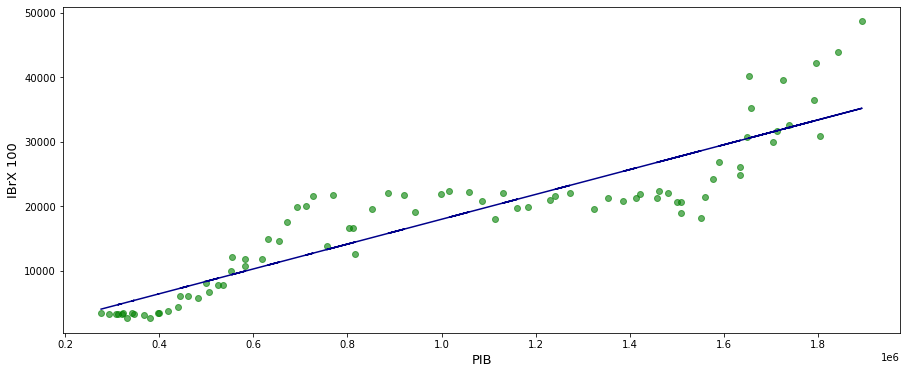

In [9]:
plt.figure(figsize=(15,6))
plt.scatter(x, y, color = 'green', alpha = 0.60);
plt.xlabel('PIB', fontsize = '13')
plt.ylabel('IBrX 100', fontsize = '13')
plt.plot(x, linha(x), color = 'darkblue')
plt.show();

<b>Observe acima como PIB e IBrX 100 apresentam comportamento cíclico, sendo que o coeficiênte angular da reta de regressão confirma a correlação fortemente positiva entre as variáveis.</b> 
Vamos agora plotar um gráfico da performance do PIB e do IBrX 100 entre os anos de 2000 e 2020. Chamo a atenção para o fato de, embora termos períodos de crise (declínio), ambas as variáveis apresentam comportamento ascendente no longo prazo.

In [10]:
evolucao = dados[['PIB', 'IBrX 100']]

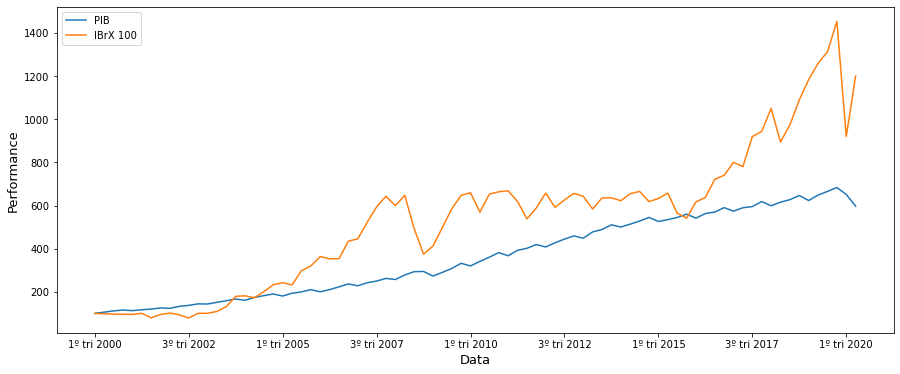

In [11]:
(evolucao / evolucao.iloc[0] * 100).plot(figsize=(15, 6));
plt.xlabel('Data', fontsize='13')
plt.ylabel('Performance', fontsize='13')
plt.show();

#### Com a análise acima, podemos concluir que é de grande importância para o investidor acompanhar o desempenho do PIB, visto que ele explica em grande parte o comportamento do Mercado de Ações. Alguns pontos abaixo são dignos de nota:
###### . 1° Foi utilizado o IBrX 100 ao invés do índice Ibovespa por conta do prazo maior de análise
###### . 2° Os dados do PIB estão representados no DataFrame em R$ milhões, mas isto nada compromete a qualidade do estudo, visto que o que nos interessa aqui é a evolução temporal das duas variáveis, e não sua magnitude
###### . 3° Melhorias no estudo podem ser feitas utilizando-se valores de PIB corrigidos pela inflação acumulada no período ou utilizando-se o PIB corrigido pelo dólar. Para este estudo, usei o PIB em valores correntes.